In [811]:
# Required
from matplotlib import pyplot as plt
import numpy as np
from math import pi, sin, cos, sqrt, pow, radians, degrees, hypot

A shaft moves at 16rpm to transmit 1kW power from pulley B to Pulley A. Design the shaft according to Maximum shear stress theory of failure Sy=550MPa
and n=2.

![Q2](figs/t5-q2-1.png)

In [812]:
Power = 1000
Sy=550E6
n=2
n_rpm=16
FOS=2

Step 1: Calculate the torque transmitted by the shaft

In [813]:
TorqueA = Power*60/(2*pi*n_rpm)
print(f'Torque = {TorqueA} Nm')

Torque = 596.8310365946076 Nm


Step 2: Find the forces acting on the shaft

In [814]:
Fa=9000
Fb=10000
Ax=round(Fa*cos(radians(45)),2)
Ay=round(Fa*sin(radians(45)),2)
By=Fb
print(f'Ax = {Ax} N')
print(f'Ay = {Ay} N')
print(f'By = {By} N')

Ax = 6363.96 N
Ay = 6363.96 N
By = 10000 N


Vertical Component

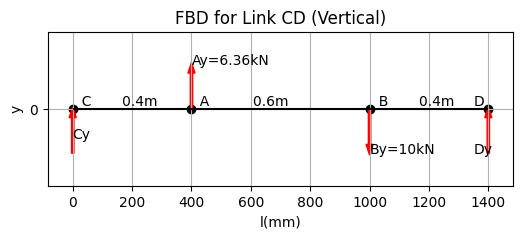

In [815]:
# FBD for Link AB

coorA = [400,0]
coorB = [1000,0]
coorC = [0,0]
coorD = [1400,0]

data = np.array([coorA,coorB,coorC,coorD])
x, y = data.T
fig, ax = plt.subplots()
fig.set_size_inches(6,2)
ax.grid()
ax.set_yticks([0])
ax.scatter(x,y, color='k')
# ax.set_ylim(-200,200)
ax.arrow(coorC[0],coorC[1]-150, 0,120,width=8,color='r')
ax.arrow(coorA[0],coorA[1], 0,120,width=8,color='r')
ax.arrow(coorB[0],coorB[1], 0,-120,width=8,color='r')
# ax.vlines(coorC[0],0,coorC[1], color='k', linestyles='dashed')
ax.arrow(coorD[0],coorD[1]-150, 0,120,width=8,color='r')
ax.hlines(0,0,1400, color='k')

ax.set(xlabel='l(mm)', ylabel='y',
       title='FBD for Link CD (Vertical)')

ax.text(coorA[0],coorA[1]+150,f'Ay=6.36kN')
ax.text(coorB[0],coorB[1]-150,f'By=10kN')
ax.text(coorC[0],coorC[1]-100,f'Cy')
ax.text(coorD[0]-50,coorD[1]-150,f'Dy')
ax.text(coorA[0],coorA[1]+10,f'  A          0.6m')
ax.text(coorB[0],coorB[1]+10,f'  B       0.4m')
ax.text(coorC[0],coorC[1]+10,f'  C       0.4m')
ax.text(coorD[0]-50,coorD[1]+10,f'D')

plt.axis('equal')
plt.show()

$$+\circlearrowleft \sum M_C=0$$
$$Ay(0.4)-By(1.0)+Dy(1.4)=0$$

$$+\uparrow \sum F_y=0$$
$$Cy+Ay-By+Dy=0$$

In [816]:
Dy=((By*1)-(Ay*0.4))/1.4
print(f'Dy = {Dy:.3e} N')

Dy = 5.325e+03 N


In [817]:
Cy=By-Ay-Dy
print(f'Cy = {Cy:.3e} N')

Cy = -1.689e+03 N


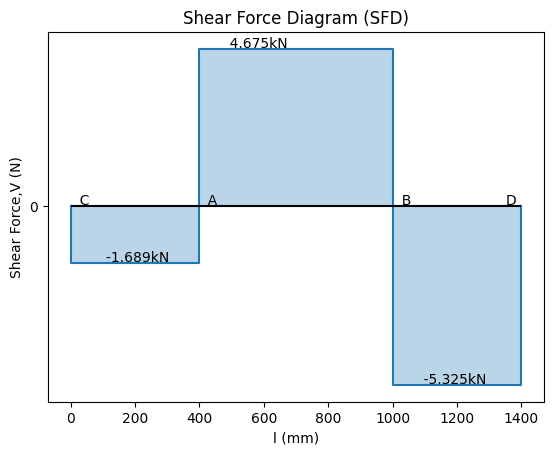

In [818]:
# Distance in mm
cd=1400
ca=400
cb=1000

y = [0,0,ca,ca,cb,cb,cd,cd]
Vy = [0,Cy,Cy,Cy+Ay,Cy+Ay,Cy+Ay-By,Cy+Ay-By,0]

fig, ax1 = plt.subplots()
ax1.set_yticks([0])
ax1.plot(y,Vy)
ax1.hlines(0,0,cd,colors='black')
ax1.fill_between(y, Vy, alpha=0.3) # Added fill_between
ax1.set_title('Shear Force Diagram (SFD)')
ax1.set_xlabel('l (mm)')
ax1.set_ylabel('Shear Force,V (N)')

ax1.text(coorA[0],coorA[1]+50,f'  A')
ax1.text(coorB[0],coorB[1]+50,f'  B')
ax1.text(coorC[0],coorC[1]+50,f'  C')
ax1.text(coorD[0]-50,coorD[1]+50,f'D')

ax1.text(coorC[0],Vy[1]+30,f'        {Vy[1]/1000:.3f}kN')
ax1.text(coorA[0],Vy[3]+30,f'       {Vy[3]/1000:.3f}kN')
ax1.text(coorB[0],Vy[5]+30,f'       {Vy[5]/1000:.3f}kN')
# plt.tight_layout()
plt.show()

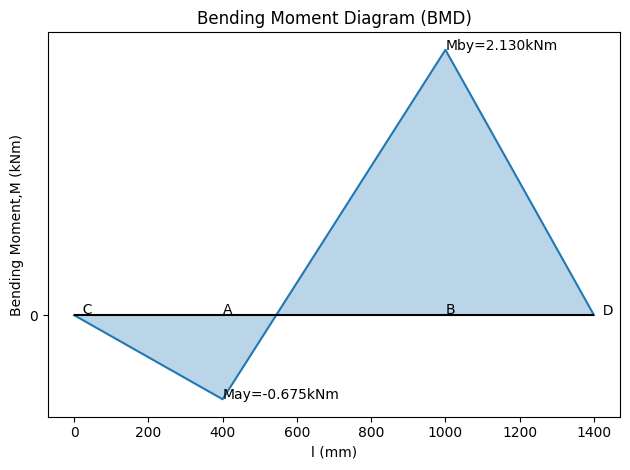

In [828]:
#BMD

y = [0,ca,cb,cd]
May=Cy*ca/1000
Mby=(Cy*ca/1000)+((Cy+Ay)*(cb-ca)/1000)
My = [0,May,Mby,0]

fig, ax2 = plt.subplots()
ax2.set_yticks([0])
ax2.plot(y,My)
ax2.hlines(0,0,cd,colors='black')
ax2.fill_between(y, My, alpha=0.3) # Added fill_between
ax2.set_title('Bending Moment Diagram (BMD)')
ax2.set_xlabel('l (mm)')
ax2.set_ylabel('Bending Moment,M (kNm)')

ax2.text(coorA[0],coorA[1]+10,f'A')
ax2.text(coorB[0],coorB[1]+10,f'B')
ax2.text(coorC[0],coorC[1]+10,f'  C')
ax2.text(coorD[0],coorD[1],f'  D')
ax2.text(coorA[0],My[1],f'May={My[1]/1000:.3f}kNm')
ax2.text(coorB[0],My[2],f'Mby={My[2]/1000:.3f}kNm')

plt.tight_layout()
plt.show()

Horizontal component

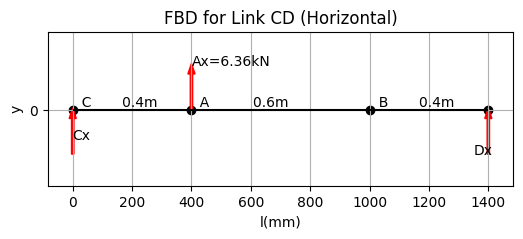

In [820]:
data = np.array([coorA,coorB,coorC,coorD])
x, y = data.T
fig, ax = plt.subplots()
fig.set_size_inches(6,2)
ax.grid()
ax.set_yticks([0])
ax.scatter(x,y, color='k')
ax.arrow(coorC[0],coorC[1]-150, 0,120,width=8,color='r')
ax.arrow(coorA[0],coorA[1], 0,120,width=8,color='r')
# ax.arrow(coorB[0],coorB[1], 0,-120,width=8,color='r')
ax.arrow(coorD[0],coorD[1]-150, 0,120,width=8,color='r')
ax.hlines(0,0,1400, color='k')

ax.set(xlabel='l(mm)', ylabel='y',
       title='FBD for Link CD (Horizontal)')

ax.text(coorA[0],coorA[1]+150,f'Ax=6.36kN')
# ax.text(coorB[0],coorB[1]-150,f'By=10kN')
ax.text(coorC[0],coorC[1]-100,f'Cx')
ax.text(coorD[0]-50,coorD[1]-150,f'Dx')
ax.text(coorA[0],coorA[1]+10,f'  A          0.6m')
ax.text(coorB[0],coorB[1]+10,f'  B       0.4m')
ax.text(coorC[0],coorC[1]+10,f'  C       0.4m')

plt.axis('equal')
plt.show()

$$+\circlearrowleft \sum M_C=0$$
$$Ax(0.4)+Dx(1.4)=0$$

$$+\uparrow \sum F_x=0$$
$$Cx+Ax+Dx=0$$

In [821]:
Dx=-Ax*0.4/1.4
print(f'Dx = {Dx:.3e} N')

Dx = -1.818e+03 N


In [822]:
Cx=-Dx-Ax
print(f'Cx = {Cx:.3e} N')

Cx = -4.546e+03 N


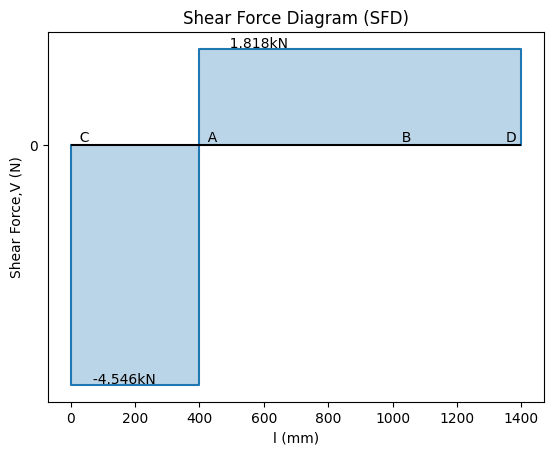

In [823]:
x = [0,0,ca,ca,cd,cd]
Vx = [0,Cx,Cx,Cx+Ax,Cx+Ax,0]

fig, ax1 = plt.subplots()
ax1.set_yticks([0])
ax1.plot(x,Vx)
ax1.hlines(0,0,cd,colors='black')
ax1.fill_between(x, Vx, alpha=0.3) # Added fill_between
ax1.set_title('Shear Force Diagram (SFD)')
ax1.set_xlabel('l (mm)')
ax1.set_ylabel('Shear Force,V (N)')

ax1.text(coorA[0],coorA[1]+50,f'  A')
ax1.text(coorB[0],coorB[1]+50,f'  B')
ax1.text(coorC[0],coorC[1]+50,f'  C')
ax1.text(coorD[0]-50,coorD[1]+50,f'D')

ax1.text(coorC[0],Vx[1]+30,f'     {Vx[1]/1000:.3f}kN')
ax1.text(coorA[0],Vx[3]+30,f'       {Vx[3]/1000:.3f}kN')

plt.show()

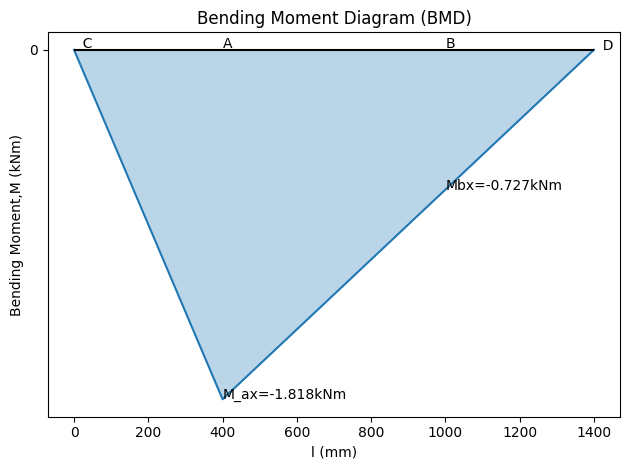

In [830]:
#BMD

x = [0,ca,cb,cd]
Max=Cx*ca/1000
# Moment at B is area under SFD from A to B
Mbx=(Cx*ca/1000)+((Cx+Ax)*(cb-ca)/1000)
Mx = [0,Max,Mbx,0]

fig, ax2 = plt.subplots()
ax2.set_yticks([0])
ax2.plot(x,Mx)
ax2.hlines(0,0,cd,colors='black')
ax2.fill_between(x, Mx, alpha=0.3) # Added fill_between
ax2.set_title('Bending Moment Diagram (BMD)')
ax2.set_xlabel('l (mm)')
ax2.set_ylabel('Bending Moment,M (kNm)')

ax2.text(coorA[0],coorA[1]+10,f'A')
ax2.text(coorB[0],coorB[1]+10,f'B')
ax2.text(coorC[0],coorC[1]+10,f'  C')
ax2.text(coorD[0],coorD[1],f'  D')
ax2.text(coorA[0],Mx[1],f'M_ax={Mx[1]/1000:.3f}kNm')
ax2.text(coorB[0],Mbx,f'Mbx={Mbx/1000:.3f}kNm')

plt.tight_layout()
plt.show()

In [825]:
print(Max,May)
print(Mbx,Mby)
Ma = round(hypot(Max,May),2)
Mb = round(hypot(Mbx,Mby),2)
print(f'Ma={Ma} Nm')
print(f'Mb={Mb} Nm')

-1818.2742857142857 -675.417142857143
-727.3097142857143 2129.8331428571423
Ma=1939.67 Nm
Mb=2250.59 Nm


In [826]:
Mmax=Mb
print(f'Maximum Bending Moment, Mmax = {Mmax:.2e} Nm')

Maximum Bending Moment, Mmax = 2.25e+03 Nm


In [827]:
print(Mmax,TorqueA)
Dmss3 = 32*FOS*hypot(Mmax,TorqueA)/(Sy*pi)
Dmss = round(pow(32*FOS*hypot(Mmax,TorqueA)/(Sy*pi),1/3),5)
print(f'D^3 = {Dmss3}m^3')
print(f'Diameter = {Dmss}m')

2250.59 596.8310365946076
D^3 = 8.624256027137762e-05m^3
Diameter = 0.04418m
